In [30]:
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
# Read the csv files into a pandas DataFrames
generated_days = 3650
df_generated = pd.read_csv('data/' + str(generated_days) + '/generated_data.csv')


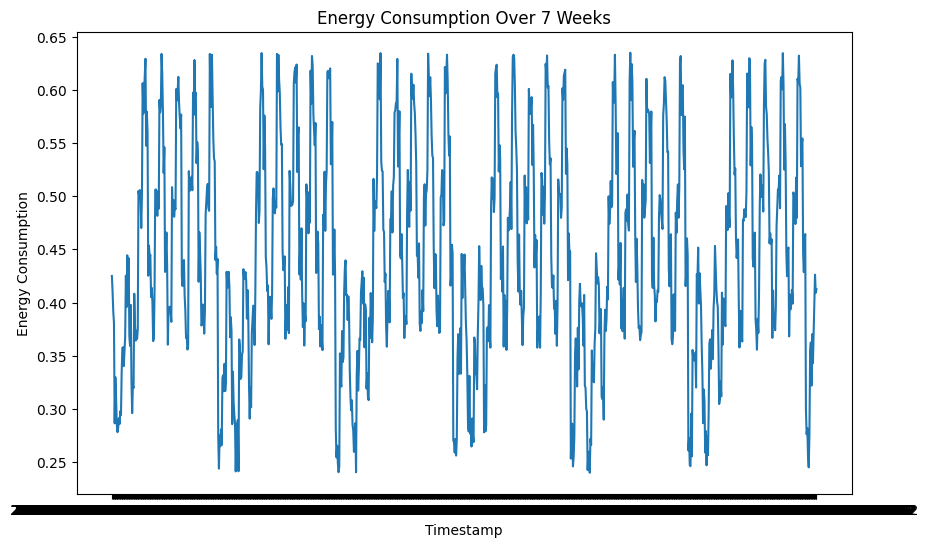

In [32]:
# Assuming each row in the DataFrame represents an hour
hours_per_day = 24
days_per_week = 7
weeks = 7

# Select the data for 7 weeks
df_weeks = df_generated.iloc[hours_per_day * days_per_week: hours_per_day * days_per_week * weeks]

# Plot the energy consumption
plt.figure(figsize=(10,6))
plt.plot(df_weeks['timestamp'], df_weeks['energy_consumption'])
plt.title('Energy Consumption Over 7 Weeks')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.show()

In [33]:
## Training and testing data
split_ratio = 0.8
split_index = int(len(df_generated) * split_ratio)
# Split the data
train_df = df_generated.iloc[:split_index]
test_df = df_generated.iloc[split_index:]

# Print the shapes of the datasets
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (70080, 7)
Testing set shape: (17520, 7)


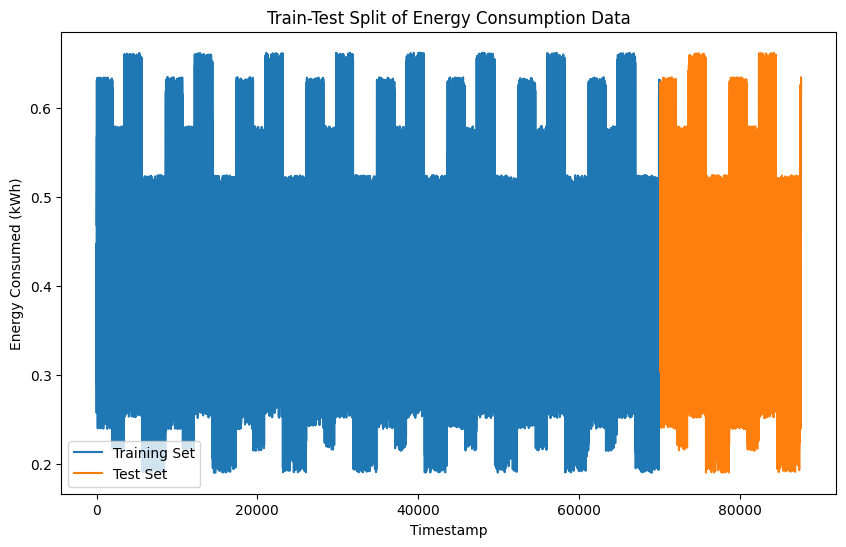

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_df.index, train_df["energy_consumption"], label='Training Set')
plt.plot(test_df.index, test_df['energy_consumption'], label='Test Set')
plt.title('Train-Test Split of Energy Consumption Data')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumed (kWh)')
plt.legend()
plt.show()

In [35]:
df_prophet = df_generated.rename(columns={'timestamp': 'ds', 'energy_consumption': 'y'})
df_prophet.head()

,ds,season,time_of_day,weekday_or_weekend,base_consumption,noise,y
0,2023-12-09 16:15:22.082642,winter,afternoon,weekend,0.4235,-0.007488,0.416012
1,2023-12-09 17:15:22.082642,winter,evening,weekend,0.3850,-0.006659,0.378341
2,2023-12-09 18:15:22.082642,winter,evening,weekend,0.3850,-0.009351,0.375649
3,2023-12-09 19:15:22.082642,winter,evening,weekend,0.3850,-0.015855,0.369145
4,2023-12-09 20:15:22.082642,winter,night,weekend,0.3080,-0.005942,0.302058


In [36]:
from prophet import Prophet

# Create a new Prophet object
model = Prophet()

# Fit the model to the historical data
model.fit(df_prophet)

17:45:03 - cmdstanpy - INFO - Chain [1] start processing
17:45:14 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# Create a future dataframe with 24 months of hourly timestamps
future = model.make_future_dataframe(periods=24, freq='H')

# Make predictions for the future timestamps
forecast = model.predict(future)

D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


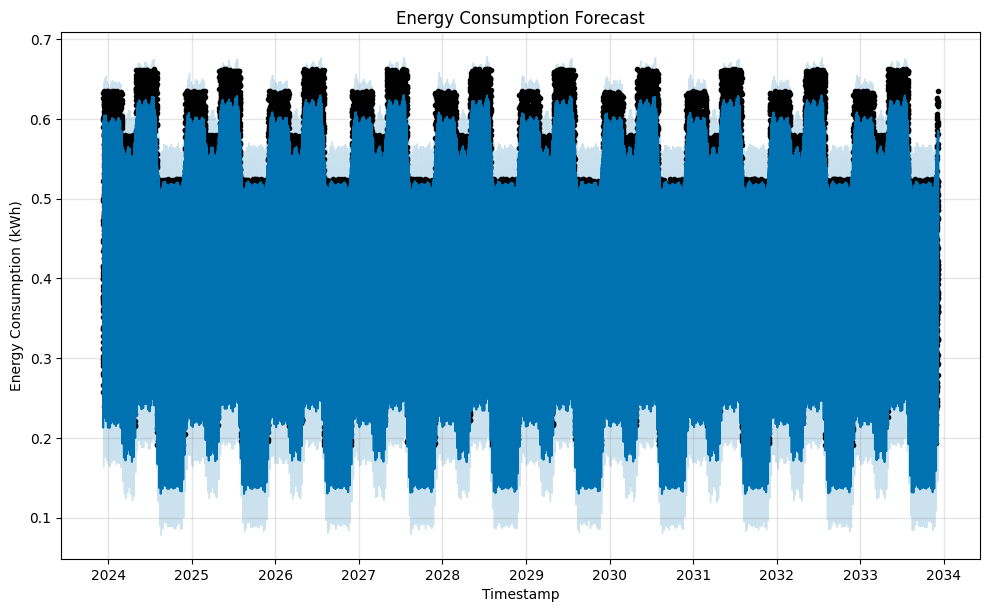

In [39]:
# Plot the forecast
model.plot(forecast, xlabel='Timestamp', ylabel='Energy Consumption (kWh)')
plt.title('Energy Consumption Forecast')
plt.show()

D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
D:\Projects\passion_projects\sih-2023\energy-predicting-model\venv\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a fut

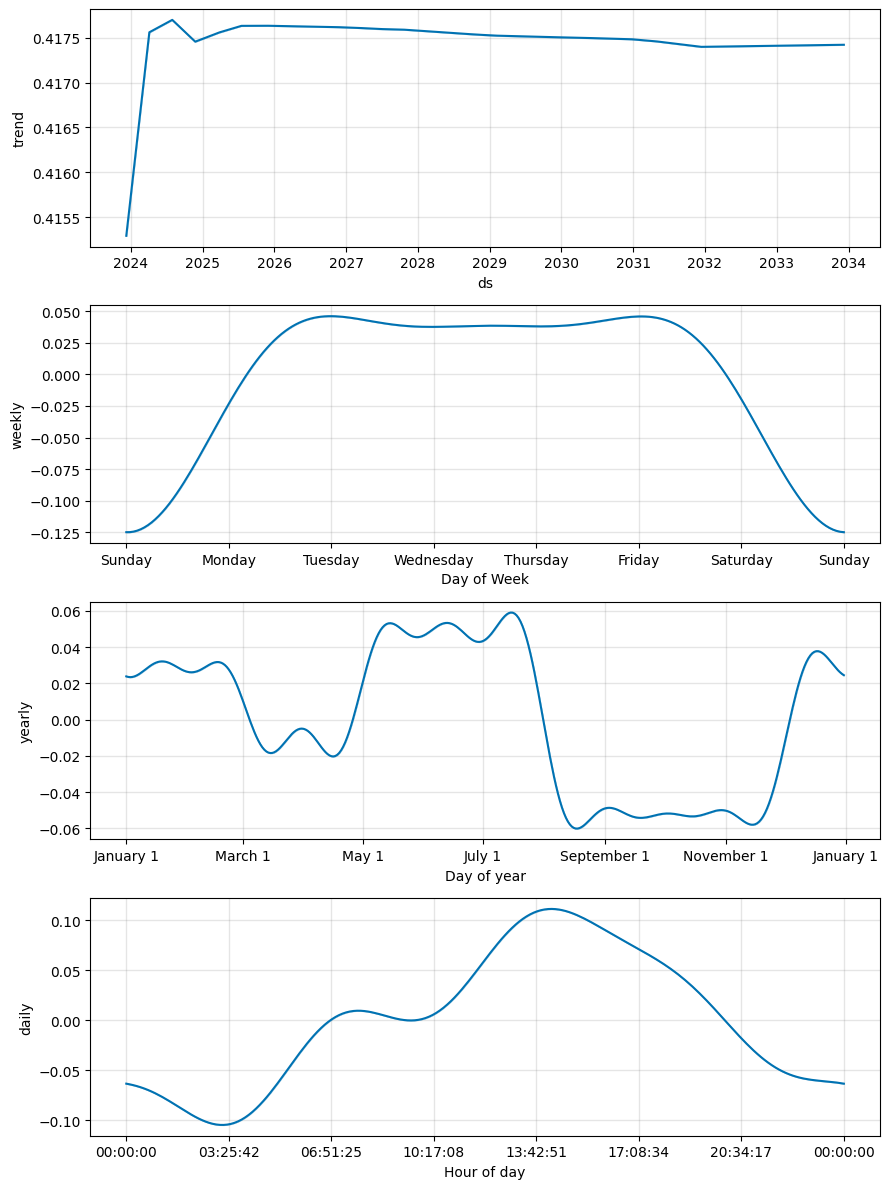

In [40]:
# Plot the components of the model
model.plot_components(forecast)
plt.show()

In [41]:
from prophet.diagnostics import cross_validation

# Perform cross-validation
# Initial: the size of the initial training period
# Period: the spacing between cutoff dates
# Horizon: the forecast horizon
df_cv = cross_validation(model, initial='1095 days', period='180 days', horizon = '365 days')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

  0%|          | 0/13 [00:00<?, ?it/s]

17:46:55 - cmdstanpy - INFO - Chain [1] start processing
17:46:58 - cmdstanpy - INFO - Chain [1] done processing
17:47:01 - cmdstanpy - INFO - Chain [1] start processing
17:47:09 - cmdstanpy - INFO - Chain [1] done processing
17:47:12 - cmdstanpy - INFO - Chain [1] start processing
17:47:14 - cmdstanpy - INFO - Chain [1] done processing
17:47:17 - cmdstanpy - INFO - Chain [1] start processing
17:47:25 - cmdstanpy - INFO - Chain [1] done processing
17:47:28 - cmdstanpy - INFO - Chain [1] start processing
17:47:34 - cmdstanpy - INFO - Chain [1] done processing
17:47:38 - cmdstanpy - INFO - Chain [1] start processing
17:47:46 - cmdstanpy - INFO - Chain [1] done processing
17:47:50 - cmdstanpy - INFO - Chain [1] start processing
17:47:52 - cmdstanpy - INFO - Chain [1] done processing
17:47:56 - cmdstanpy - INFO - Chain [1] start processing
17:48:09 - cmdstanpy - INFO - Chain [1] done processing
17:48:14 - cmdstanpy - INFO - Chain [1] start processing
17:48:23 - cmdstanpy - INFO - Chain [1]

In [43]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,0.001492,0.038625,0.031100,0.075590,0.058545,0.074127,0.765982
1,36 days 13:00:00,0.001491,0.038614,0.031091,0.075624,0.058567,0.074160,0.766333
2,36 days 14:00:00,0.001493,0.038645,0.031117,0.075739,0.058669,0.074261,0.765894
3,36 days 15:00:00,0.001493,0.038644,0.031116,0.075750,0.058714,0.074276,0.765806
4,36 days 16:00:00,0.001492,0.038624,0.031101,0.075738,0.058669,0.074259,0.766070
